In [ ]:
---
title: "U.S. Medical Insurance Costs"
author: "Brian Cervantes Alvarez"
date: "2022-07-14"
categories: [python, healthcare, analysis, stats]
image: "health_ins.jepg"
---

# U.S. Medical Insurance Costs

## Purpose of this Project

This is a portolifo project for the medical industry to demonstrate the ability to provide visualizations and statistical inferences when given a cleaned up data set. In this case, I am looking into the U.S. Medical Insurance Costs sample data set that was provided by Codecademy's Data Scientist: Inference Specialist Path: https://www.kaggle.com/datasets/mirichoi0218/insurance

Here are a few questions I formulated before diving into the data set: *What single component causes the most increase in insurance costs? What variables play a role in increasing or decreasing insurance costs? What would be the ideal individual to minimize the cost of medical insurance?*

I immediately identified **smoker** as being a key variable to analyze their individual costs. Plus, I dive into the difference of between male and female insurance costs for both smokers and nonsmokers.

**If you wish to skip towards the results portion, feel free to scroll down and have a quick read! Interesting results were found.**


### Set Up and Importing the Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#read in the csv file
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Analyzing Smoker Insurance Costs


We want to know what influences the cost of insurance. What causes an individual to pay more for their insurance? We can infer that being a smoker will drastically increase their out of pocket medical insurance expenses. 

I take a look into how many smokers we have in this data set. Then, I take a quick look into the smokers' distribution of charges and show a boxplot to visualize the insurance cost quartiles. Next, I dive into using some statistics such as finding the min, max, mean, median, etc. I follow up by seperating male and female smokers and seeing if there's a drastic change in their expenses.

### Histogram Plot of Smokers vs Nonsmokers
- Smoker Count: 274 
- Nonsmoker Count: 1064

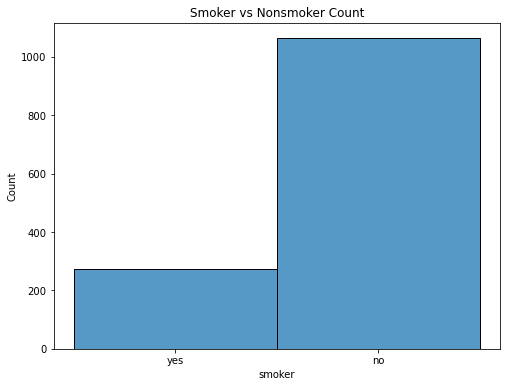

<Figure size 432x288 with 0 Axes>

In [4]:
#while a histogram is not necessary, it can really show in the visual count of smokers vs nonsmokers
plt.figure(figsize = (8, 6))
sns.histplot(df.smoker)
plt.title('Smoker vs Nonsmoker Count')
plt.savefig('smoker_vs_nonsmoker_count.png')
plt.show()
plt.clf()

#num_smokers = df.smoker.value_counts()['yes']
#num_nonsmokers = df.smoker.value_counts()['no']
#print("Exact number of smokers: {num_smokers}".format(num_smokers = num_smokers))
#print("Exact number of nonsmokers: {num_nonsmokers}".format(num_nonsmokers = num_nonsmokers))

### Boxplot and Histogram Distribution of Insurance Costs for Smokers
The interquartile range is \$20,125.33. Very high spread from the first and third interquartiles.

Now, notice that we have a bimodal distribution. This means that there is a variable in the data set that is drastically affecting the insurance cost. Since there is two "humps" we must identify the component that causes a further jump in insurance costs for those who smoke.

What could cause this?
- Region?
- Bmi?
- Sex?
- Children?
- Age?

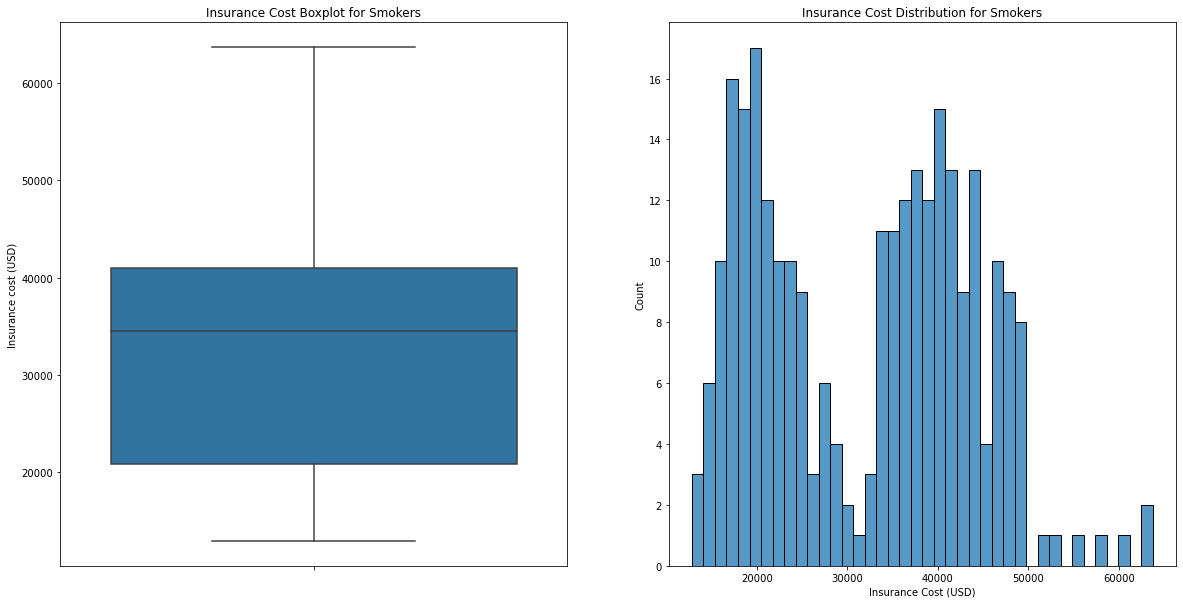

<Figure size 432x288 with 0 Axes>

In [5]:
df_smokers = df[df.smoker == 'yes']
#print(df_smokers.head())

IQR = stats.iqr(df_smokers.charges, interpolation = 'midpoint')
#print(round(IQR,2))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#boxplot
sns.boxplot(y = df_smokers.charges, ax = ax1)
ax1.set_ylabel('Insurance cost (USD)')
ax1.set_title('Insurance Cost Boxplot for Smokers')

#histogram
sns.histplot(df_smokers.charges, bins = 40, ax = ax2)
ax2.set_xlabel('Insurance Cost (USD)')
ax2.set_title('Insurance Cost Distribution for Smokers')

plt.savefig('smoker_charges_boxplot_histogram.png')
plt.show()
plt.clf()


### Insurance Cost Statistics for Smokers

Summary Stats:
- Mean: \$32,050.23
- Median: \$34,456.35
- Max: \$63,770.43
- Min: \$12,829.46
- Standard Deviation: \$11,520.47
- Variance: 132721153.14

Given the distribution, we can say that the mean represents the true average insurance cost for smokers.

In [6]:
#find mean of insurance cost for smokers
smoker_mean = round(np.mean(df_smokers.charges), 2)
print('The average insurance cost for being a smoker: ${mean}'.format(mean = smoker_mean))
#find median of insurance cost for smokers
smoker_median = round(np.median(df_smokers.charges), 2)
print('The median insurance cost for being a smoker: ${median}'.format(median = smoker_median))
#find standard deviation...
smoker_std = round(np.std(df_smokers.charges),2)
print('The standard deviation is: ${std}'.format(std = smoker_std))
#let's see the variance
smoker_var = round(np.var(df_smokers.charges),2)
print('The variance is: {var}'.format(var = smoker_var))
#maximum cost
smoker_max = round(np.max(df_smokers.charges), 2)
print('The maximum insurance cost for being a smoker is: ${max}'.format(max = smoker_max))
#minimum cost
smoker_min = round(np.min(df_smokers.charges), 2)
print('The minimum insurance cost for being a smoker is: ${min}'.format(min = smoker_min))


The average insurance cost for being a smoker: $32050.23
The median insurance cost for being a smoker: $34456.35
The standard deviation is: $11520.47
The variance is: 132721153.14
The maximum insurance cost for being a smoker is: $63770.43
The minimum insurance cost for being a smoker is: $12829.46


### Seperating Male and Female Smokers
I chose to seperate male and female smokers to see if there was a noticable difference in cost. Notice in the graphs below, that we can easily identify the culprit for the bimodal distribution. The **BMI** drastically influences the insurance cost when it is greater than or equal to 30 (the obese rating starts at 30 forward). *This means that being obese AND being a smoker can sharply increase your medical insurance cost.*

Note: As **Age** slowly increases, the insurance cost also slowly increases. So, there is a gradual increase in insurance cost as you age. That is common sense since as one ages, one develops more health issues as they near death.   

### Analyzing Male Smokers
Graph One: Cost Distribution
- Bimodal Distribution is again present.
- Two clusters of cost are due to an underlying variable.

Graph Two: Barplot of Average Cost per Child
- No clear trend.
- Only valuable note is that having 4 children seems to have an overall lower average insurance cost.

Graph Three: Scatterplot of Cost vs BMI with Region
- There is a visable linear relationship between BMI and Cost.
- There are two clusters of individuals but follows the linear relationship.
- At >=30 BMI, there is a clear signifcant increase in insurance cost for male smokers.
- Note: a BMI of 30 or implies that the individual is "obese" (though, BMI is not necessarily a good measurement--see results).
- No trends with the region.

Graph Four: Scatterplot of Cost vs Age with Children
- There is a linear trend, but split into two linear clusters.
- As found earlier, this is most likely due to BMI differences in the indivduals.
- Overtime, an individual's insurance cost will increase as expected.

Graph Five: Barplot of Average Cost per Region
- No valuable insights can be drawn.

Graph Six: Boxplot of Male Smoker Insurance Cost
- Noteworthy to see the spread of male smokers' insurance cost. 

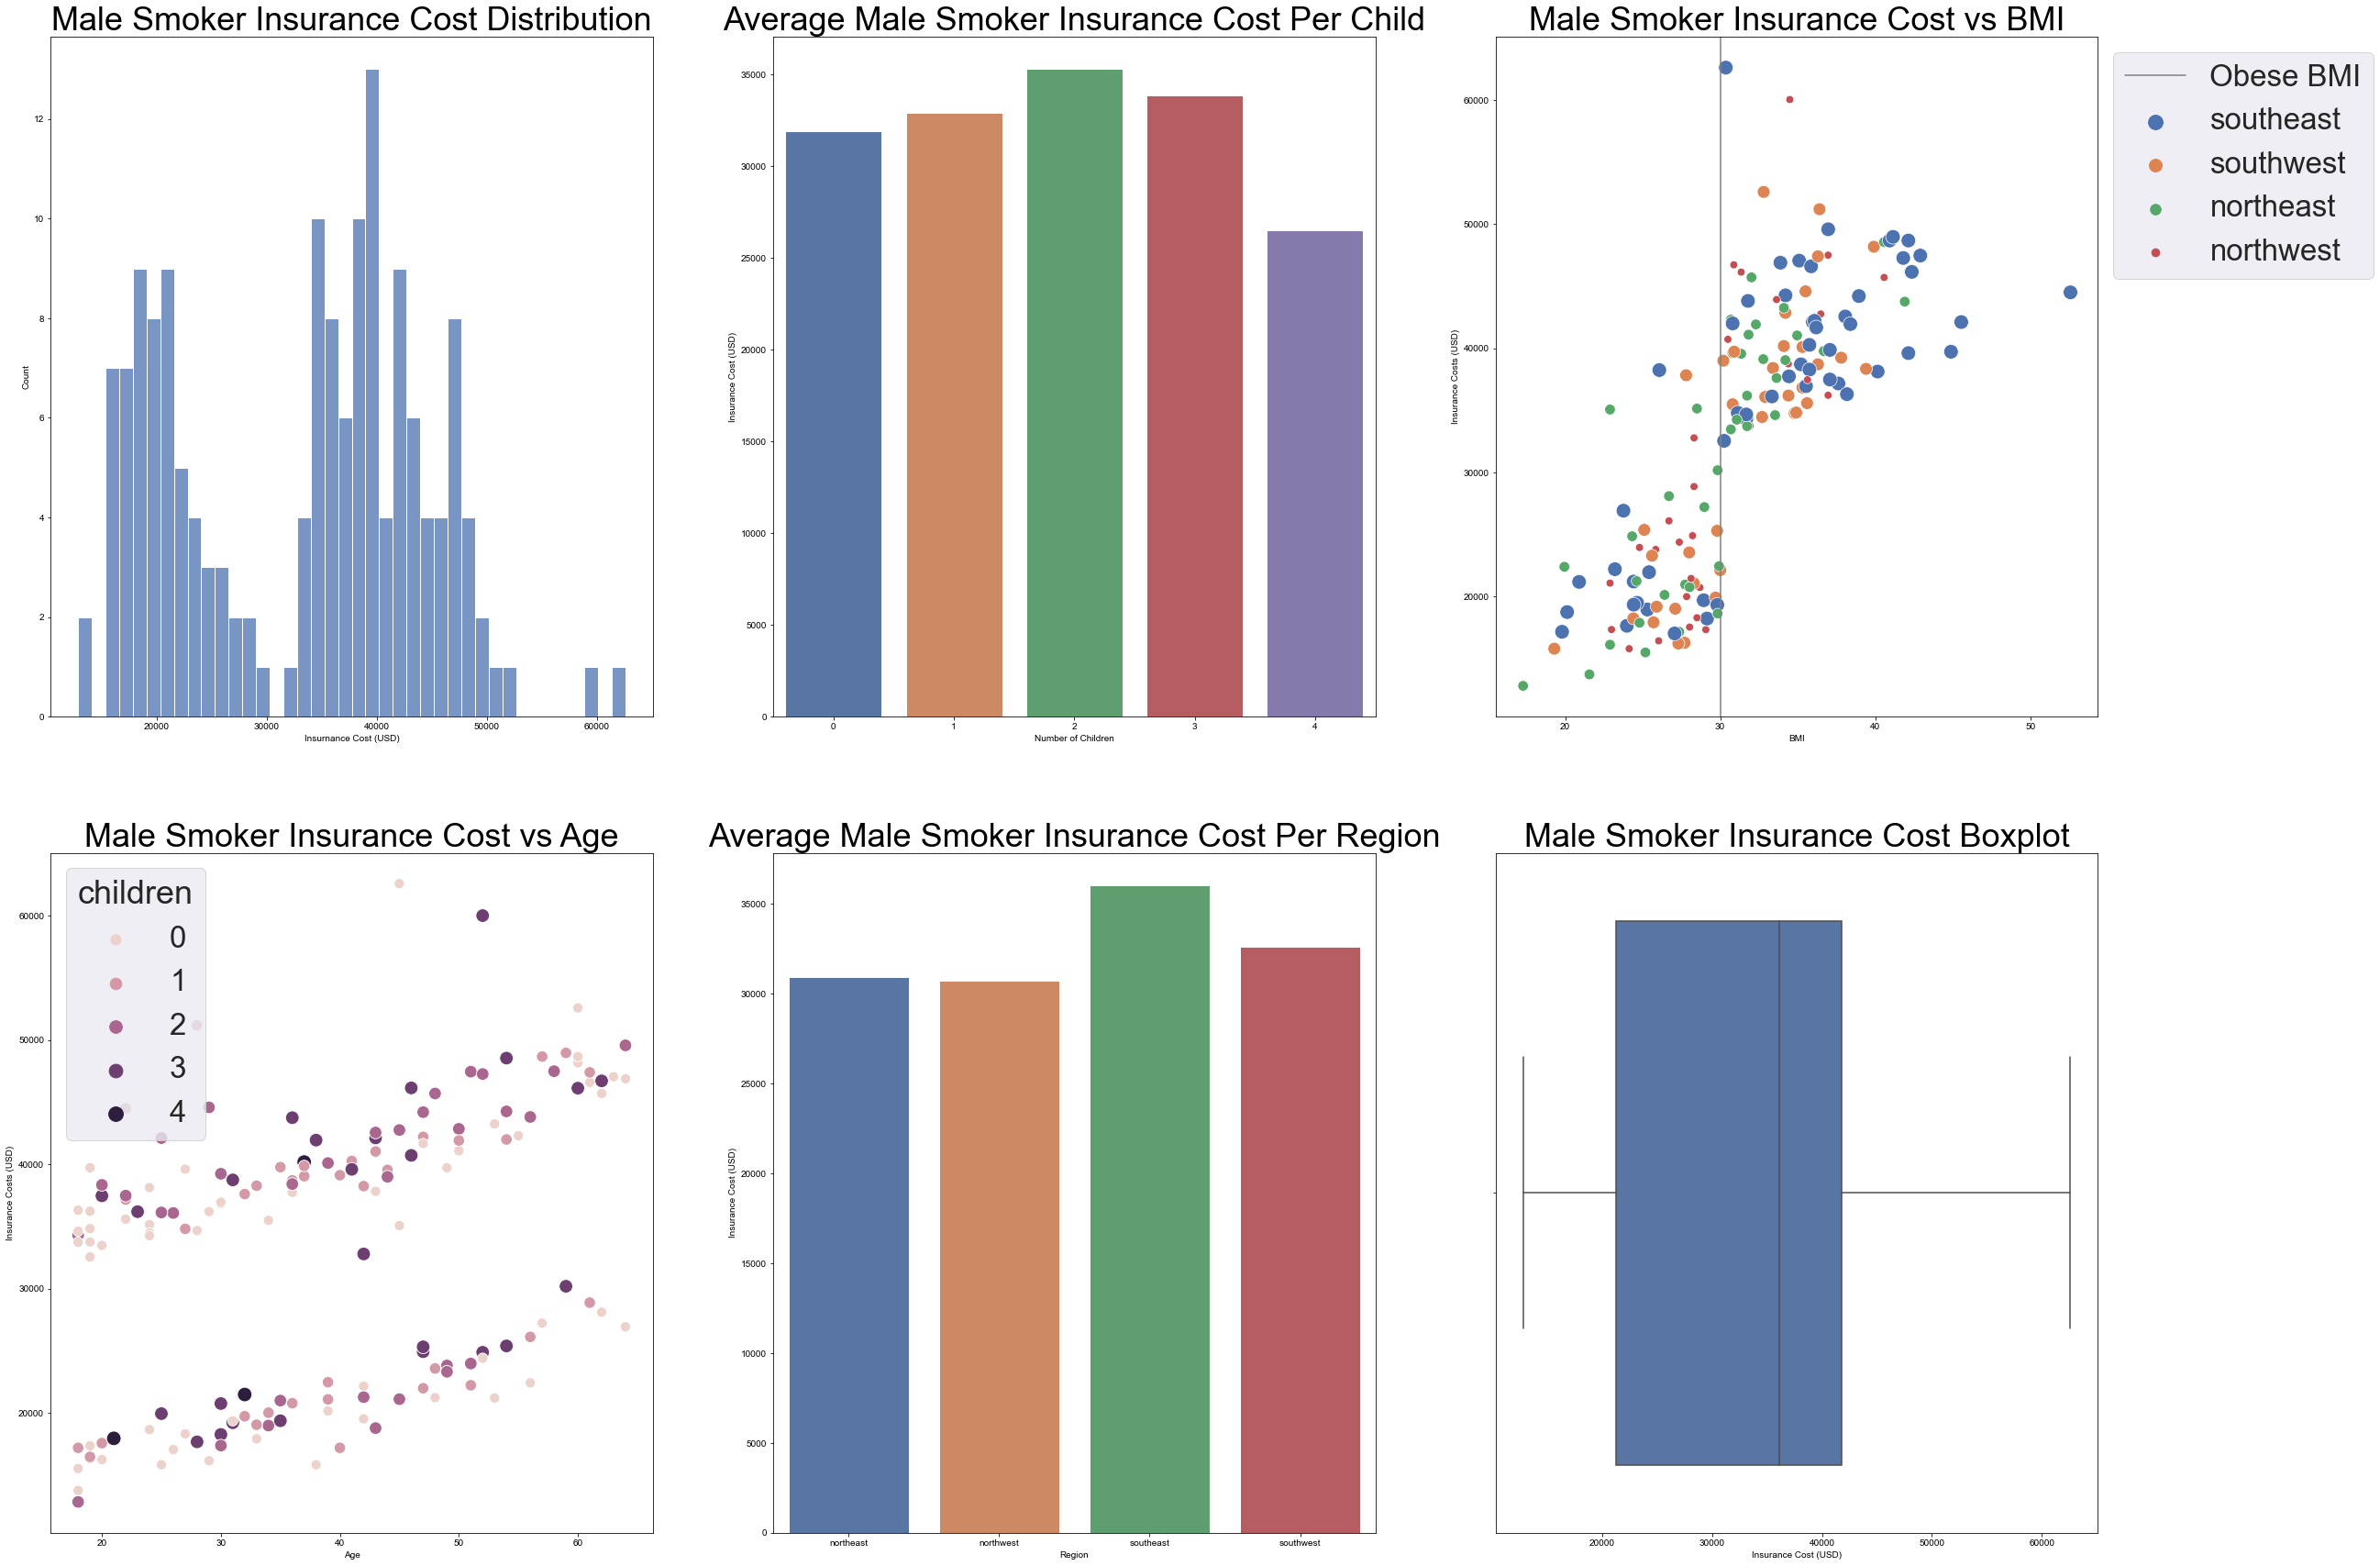

<Figure size 432x288 with 0 Axes>

In [7]:
#seperate all male smokers from the main data set
df_male_smoker = df_smokers[df_smokers.sex == 'male']

#print(df_male_smoker.head())

fig, ax = plt.subplots(2,3,figsize=(40,30))
sns.set_style('darkgrid')
sns.set(font_scale = 3)

#histogram male smoker
sns.histplot(df_male_smoker.charges, bins = 40, ax = ax[0,0])
ax[0,0].set_title('Male Smoker Insurance Cost Distribution')
ax[0,0].set_xlabel('Insurnance Cost (USD)')

#barplot for insurance cost of male smokers per child
df_children = df_male_smoker.groupby('children').mean().reset_index()
#print(df_children.head())

sns.barplot(x = df_children.children, y = df_children.charges, ax = ax[0,1])
ax[0,1].set_title('Average Male Smoker Insurance Cost Per Child')
ax[0,1].set_xlabel('Number of Children')
ax[0,1].set_ylabel('Insurance Cost (USD)')

#scatterplot for insurance cost of male smokers by BMI
sns.scatterplot(x = df_male_smoker.bmi, y = df_male_smoker.charges,
                hue = df_male_smoker.region,
                size = df_male_smoker.region,
                sizes = (75, 250), ax = ax[0,2])
ax[0,2].axvline(x = 30, color = 'gray', label = 'Obese BMI')
ax[0,2].set_title('Male Smoker Insurance Cost vs BMI')
ax[0,2].set_xlabel('BMI')
ax[0,2].set_ylabel('Insurance Costs (USD)')
ax[0,2].legend(bbox_to_anchor = (1.0, 1))

#scatterplot for insurance cost of male smokers by age
sns.scatterplot(x = df_male_smoker.age, y = df_male_smoker.charges,
                hue = df_male_smoker.children,
                size = df_male_smoker.children, sizes = (125,250),
                ax = ax[1,0])
ax[1,0].set_title('Male Smoker Insurance Cost vs Age')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Insurance Costs (USD)')

#barplot for insurance cost of male smokers per region
df_region = df_male_smoker.groupby('region').mean().reset_index()
#print(df_region.head())

sns.barplot(x = df_region.region,  y = df_region.charges, ax = ax[1,1])
ax[1,1].set_title('Average Male Smoker Insurance Cost Per Region')
ax[1,1].set_xlabel('Region')
ax[1,1].set_ylabel('Insurance Cost (USD)')

#boxplot of male smoker boxplot
sns.boxplot(x = df_male_smoker.charges, ax = ax[1,2])
ax[1,2].set_title('Male Smoker Insurance Cost Boxplot')
ax[1,2].set_xlabel('Insurance Cost (USD)')
plt.savefig('male_smoker_charges_plots.png')
plt.show()
plt.clf()




### BMI Graph Highlighted

As mentioned above, the reason why the cost distribution had two clusters was due to the difference in BMI in each male smoker. Male smokers with a BMI >= 30 will that their expense increase by approximately 47%. 

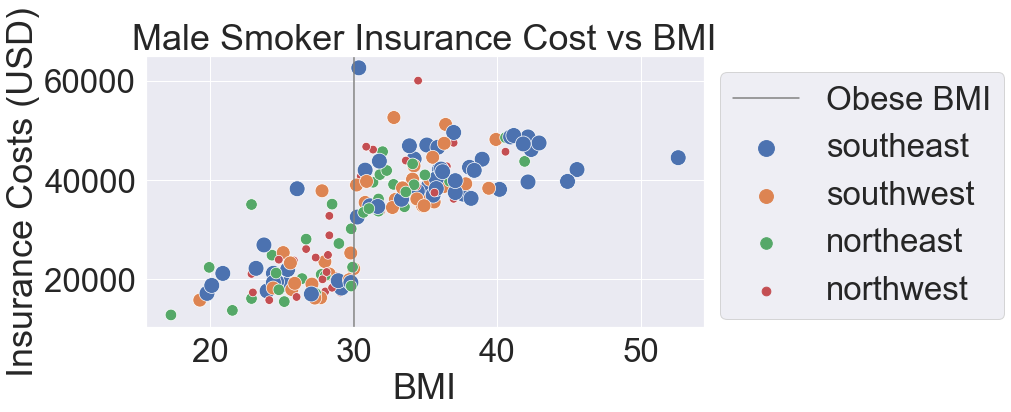

In [8]:
#highlight BMI graph
plt.figure(figsize = (10, 5))
sns.scatterplot(x = df_male_smoker.bmi, y = df_male_smoker.charges,
                hue = df_male_smoker.region,
                size = df_male_smoker.region,
                sizes = (75, 250))
plt.axvline(x = 30, color = 'gray', label = 'Obese BMI')
plt.title('Male Smoker Insurance Cost vs BMI')
plt.xlabel('BMI')
plt.ylabel('Insurance Costs (USD)')
plt.legend(bbox_to_anchor = (1.0, 1))


In [9]:
#analyze BMI < 30

male_df_bmi = df_male_smoker[df_male_smoker.bmi < 30]
male_avg_cost = round(np.mean(male_df_bmi.charges, axis = 0),2)
print("The average insurance cost for male smokers with a BMI of less than 30 equates to: ${charge}".format(charge = male_avg_cost))

#analyze BMI >= 30

male_df2_bmi = df_male_smoker[df_male_smoker.bmi >= 30]
male_avg_cost_2 = round(np.mean(male_df2_bmi.charges, axis = 0),2)
print("The average insurance cost for male smokers with a BMI of greater than or equal to 30 equates to: ${charge}".format(charge = male_avg_cost_2))

#Difference of Insurance Cost
male_diff_cost = male_avg_cost_2 - male_avg_cost
print("The difference in insurance cost from being at or over 30 BMI compared to being under 30 BMI for males is: ${diff}".format(diff = male_diff_cost))

male_diff_cost_percent = 100*round(male_diff_cost / male_avg_cost_2, 2)
print('A male smoker will suffer an increase of {percent}% in their insurance cost by being obese (BMI >= 30)'.format(percent = male_diff_cost_percent))





The average insurance cost for male smokers with a BMI of less than 30 equates to: $21643.07
The average insurance cost for male smokers with a BMI of greater than or equal to 30 equates to: $41131.57
The difference in insurance cost from being at or over 30 BMI compared to being under 30 BMI for males is: $19488.5
A male smoker will suffer an increase of 47.0% in their insurance cost by being obese (BMI >= 30)


### Analyzing Female Smokers

Graph One: Cost Distribution
- Bimodal Distribution is again present.
- Two clusters of cost are due to an underlying variable.

Graph Two: Barplot of Average Cost per Child
- No clear trend.
- Only valuable note is that having 5 children seems to have an overall lower average insurance cost.

Graph Three: Scatterplot of Cost vs BMI with Region
- There is a visable linear relationship between BMI and Cost
- There are two clusters of individuals but follows the linear relationship.
- At >=30 BMI, there is a clear signifcant increase in insurance cost for female smokers.
- Note: a BMI of 30 or implies that the individual is "obese" (though, BMI is not necessarily a good measurement--see results).
- No trends with the region.

Graph Four: Scatterplot of Cost vs Age with Children
- There is a linear trend, but split into two linear clusters.
- As found earlier, this is most likely due to BMI differences in the indivduals.
- Overtime, an individual's insurance cost will increase as expected.

Graph Five: Barplot of Average Cost per Region
- No valuable insights can be drawn.

Graph Six: Boxplot of Female Smoker Insurance Cost
- Noteworthy to see the spread of female smokers' insurance cost. 


Given that the Insurane Cost vs BMI is essentially the same as male smokers, the stated results will apply here.

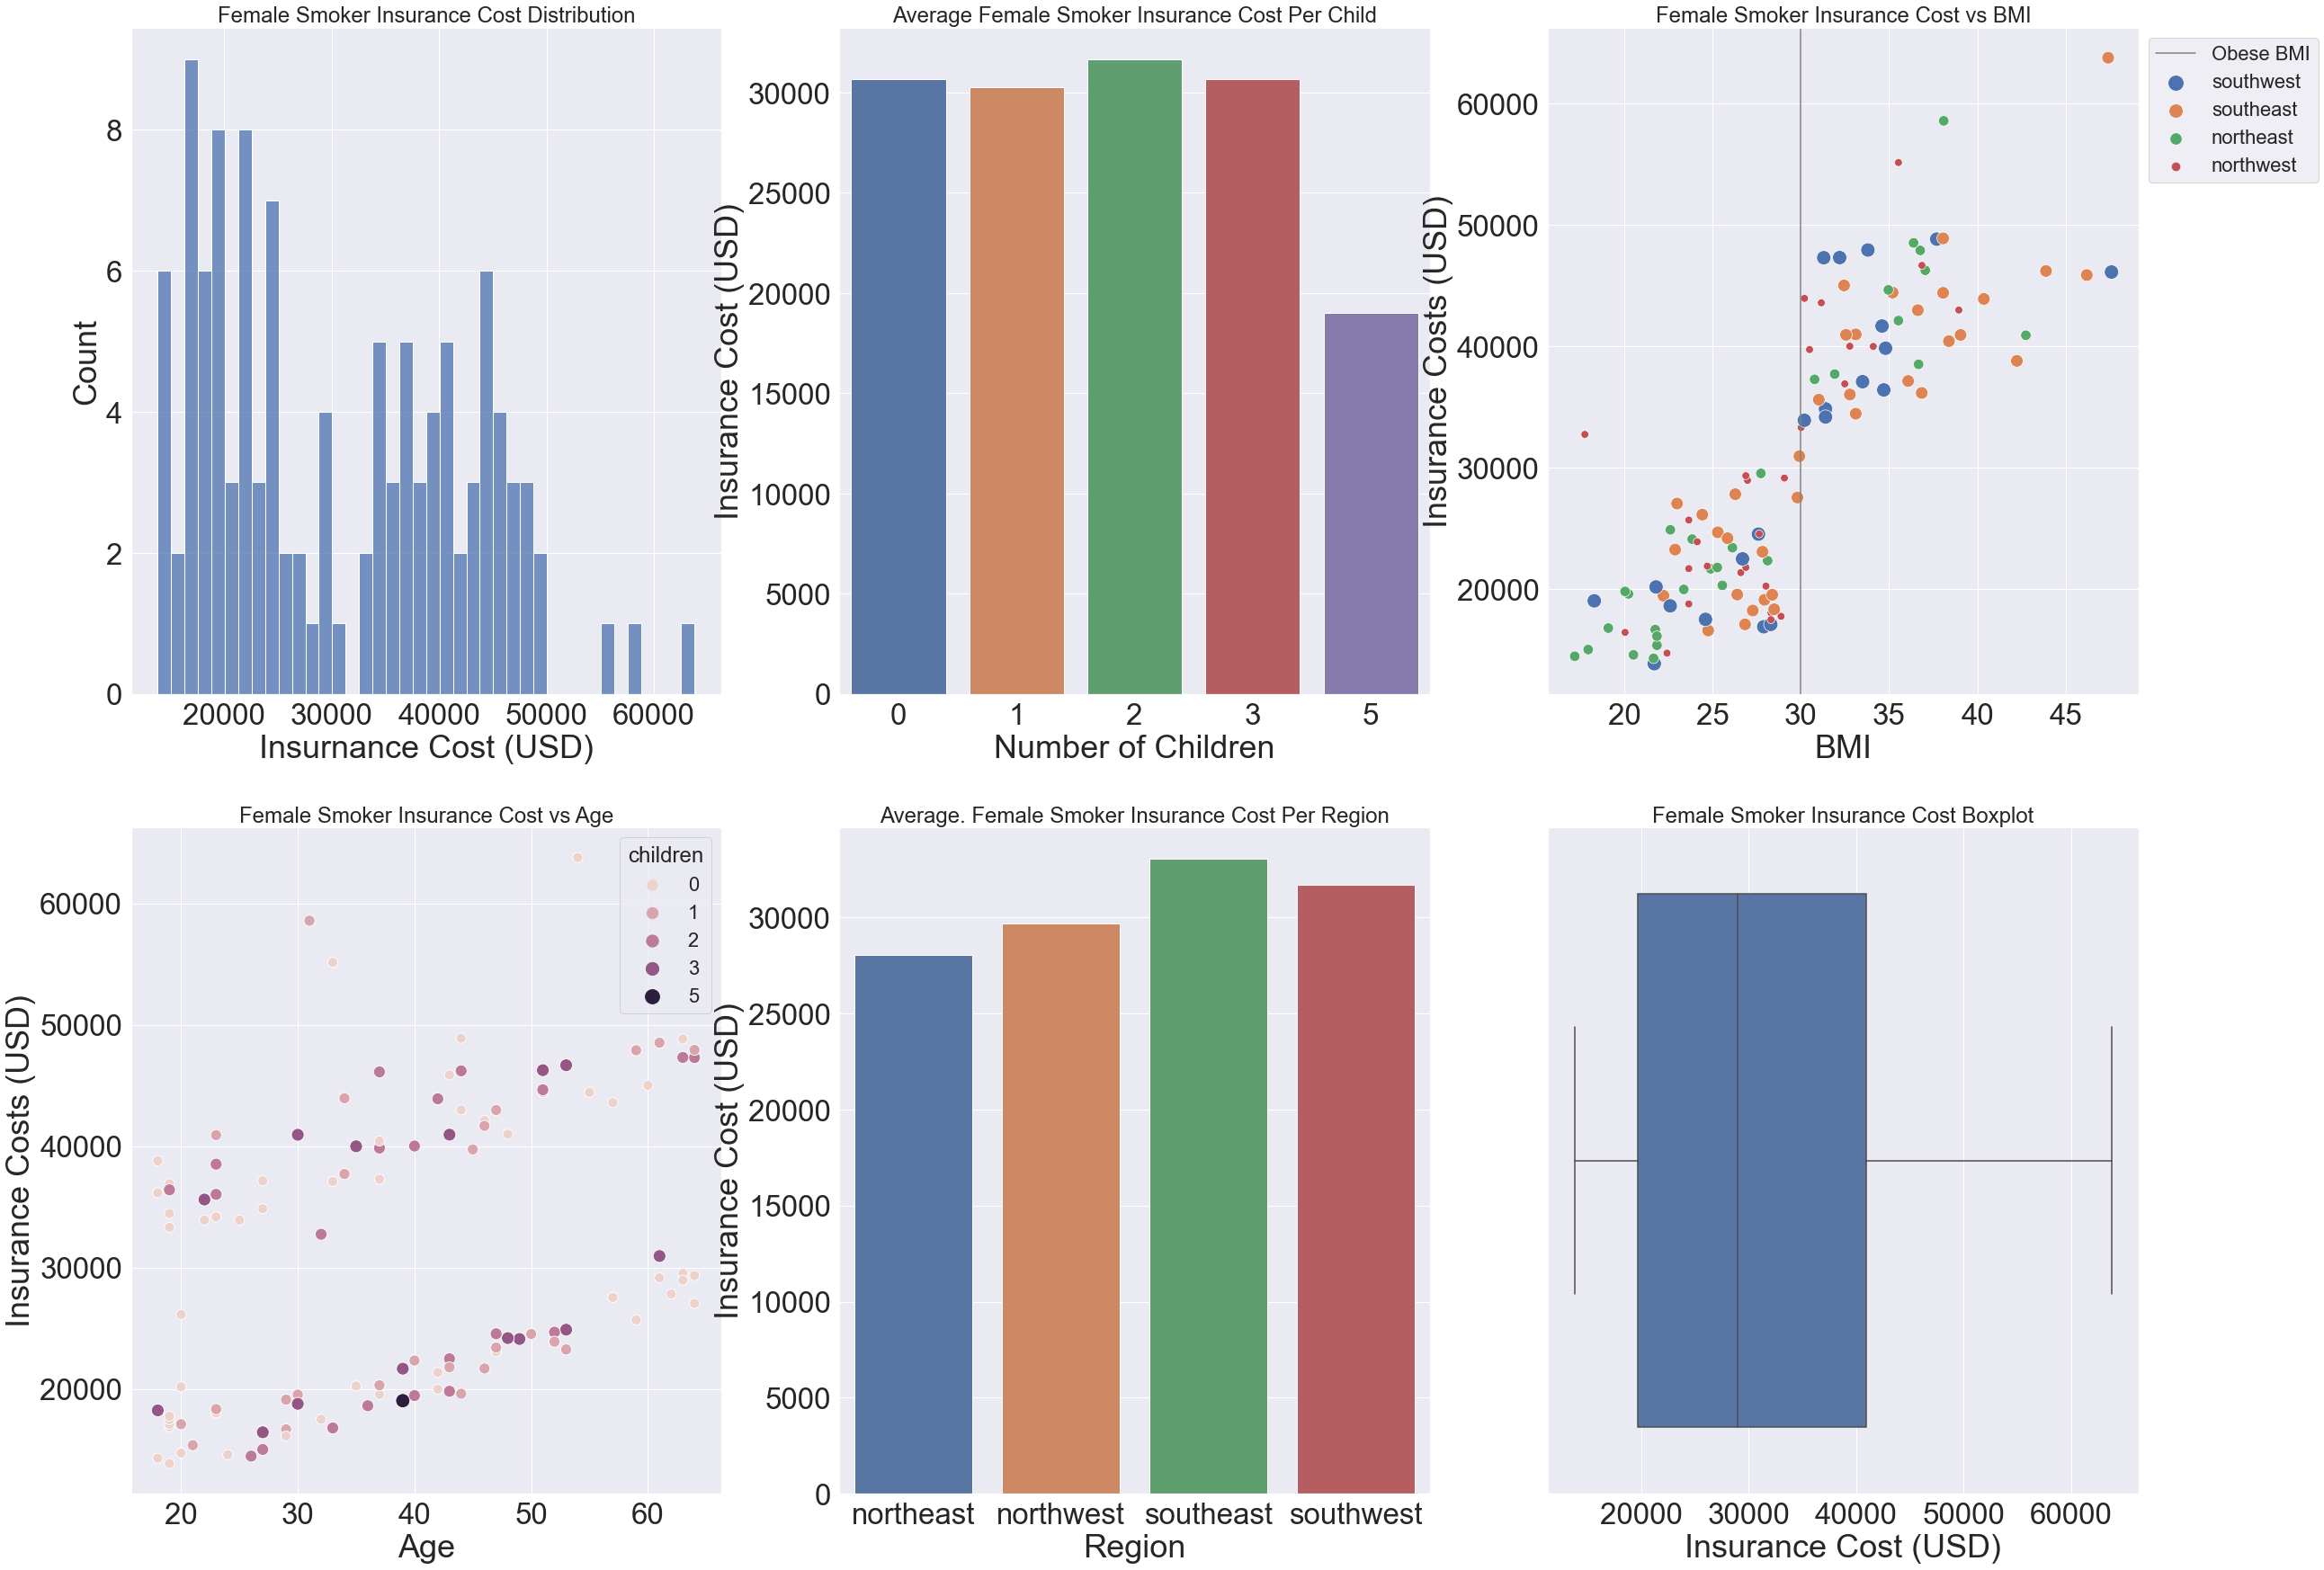

<Figure size 432x288 with 0 Axes>

In [10]:
#seperate all female smokers from the main data set
df_female_smoker = df_smokers[df_smokers.sex == 'female']

fig, ax = plt.subplots(2,3,figsize=(40,30))
sns.set_style('darkgrid')
sns.set(font_scale = 2)

#histogram male smoker
sns.histplot(df_female_smoker.charges, bins = 40, ax = ax[0,0])
ax[0,0].set_title('Female Smoker Insurance Cost Distribution')
ax[0,0].set_xlabel('Insurnance Cost (USD)')

#barplot for insurance cost of female smokers per child
df_children = df_female_smoker.groupby('children').mean().reset_index()
#print(df_children.head())

sns.barplot(x = df_children.children, y = df_children.charges, ax = ax[0,1])
ax[0,1].set_title('Average Female Smoker Insurance Cost Per Child')
ax[0,1].set_xlabel('Number of Children')
ax[0,1].set_ylabel('Insurance Cost (USD)')

#scatterplot for insurance cost of female smokers by BMI
sns.scatterplot(x = df_female_smoker.bmi, y = df_female_smoker.charges,
                hue = df_female_smoker.region,
                size = df_female_smoker.region,
                sizes = (75, 250), ax = ax[0,2])
ax[0,2].axvline(x = 30, color = 'gray', label = 'Obese BMI')
ax[0,2].set_title('Female Smoker Insurance Cost vs BMI')
ax[0,2].set_xlabel('BMI')
ax[0,2].set_ylabel('Insurance Costs (USD)')
ax[0,2].legend(bbox_to_anchor = (1.0, 1))

#scatterplot for insurance cost of female smokers by age
sns.scatterplot(x = df_female_smoker.age, y = df_female_smoker.charges,
                hue = df_female_smoker.children,
                size = df_female_smoker.children,
                sizes = (125, 250), ax = ax[1,0])
ax[1,0].set_title('Female Smoker Insurance Cost vs Age')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Insurance Costs (USD)')

#barplot for insurance cost of female smokers per region
df_region = df_female_smoker.groupby('region').mean().reset_index()
#print(df_region.head())

sns.barplot(x = df_region.region,  y = df_region.charges, ax = ax[1,1])
ax[1,1].set_title('Average. Female Smoker Insurance Cost Per Region')
ax[1,1].set_xlabel('Region')
ax[1,1].set_ylabel('Insurance Cost (USD)')

#boxplot of female smoker age vs bmi
sns.boxplot(x = df_female_smoker.charges, ax = ax[1,2])
ax[1,2].set_title('Female Smoker Insurance Cost Boxplot')
ax[1,2].set_xlabel('Insurance Cost (USD)')

plt.savefig('female_smoker_charges_plots.png')
plt.show()
plt.clf()


In [11]:
#analyze BMI < 30

female_df_bmi = df_female_smoker[df_female_smoker.bmi < 30]
female_avg_cost = round(np.mean(female_df_bmi.charges, axis = 0),2)
print("The average insurance cost for female smokers with a BMI of less than 30 equates to: ${charge}".format(charge = female_avg_cost))

#analyze BMI >= 30

female_df2_bmi = df_female_smoker[df_female_smoker.bmi >= 30]
female_avg_cost_2 = round(np.mean(female_df2_bmi.charges, axis = 0),2)
print("The average insurance cost for female smokers with a BMI of greater than or equal to 30 equates to: ${charge}".format(charge = female_avg_cost_2))

#Difference of Insurance Cost
female_diff_cost = female_avg_cost_2 - female_avg_cost
print("The difference in cost from being at or over 30 BMI compared to being under 30 BMI for females is: ${diff}".format(diff = female_diff_cost))


The average insurance cost for female smokers with a BMI of less than 30 equates to: $21070.04
The average insurance cost for female smokers with a BMI of greater than or equal to 30 equates to: $42320.62
The difference in cost from being at or over 30 BMI compared to being under 30 BMI for females is: $21250.58


### Average Insurance Cost Comparision of Male and Female Smokers

Noteworthy mention: 
- Male smokers pay approximately 1.34% more than their female counterparts when their BMI less than 30.
- Male smokers pay approximately 1.42% less than their female counterparts when their BMI greater than or equal to 30.



Male smokers are expected to pay approximately 1.34% more than their female counterparts when their BMI < 30 
Male smokers are expected to pay approximately 1.42% less than their female counterparts when their BMI >= 30


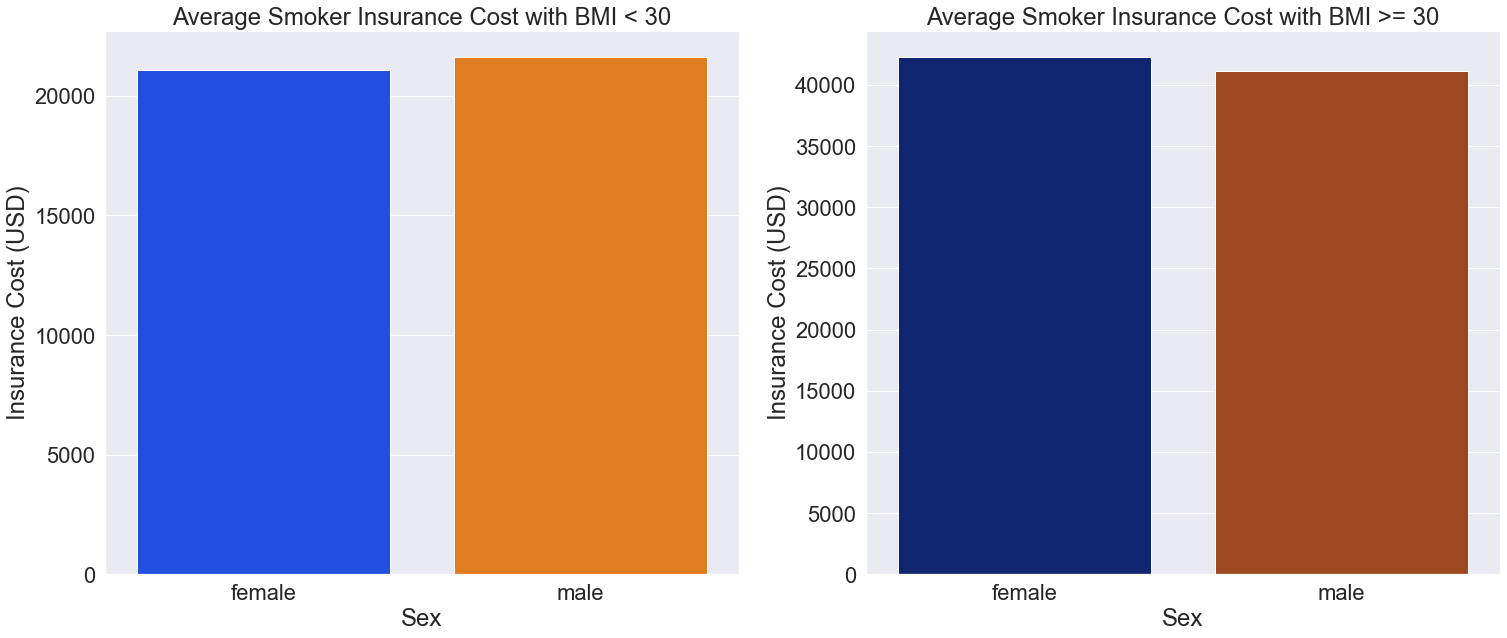

<function matplotlib.pyplot.clf()>

In [57]:
#Plot average insurance cost for male and female 
df_bmi_less_than_30 = df_smokers[df_smokers.bmi < 30]
df_one = df_bmi_less_than_30.groupby('sex').mean().reset_index()

#Get value
male_bmi_less_than_30 = df_one[df_one.sex == 'male'].charges.sum()
female_bmi_less_than_30 = df_one[df_one.sex == 'female'].charges.sum()
#print value

male_female_sum = male_bmi_less_than_30 + female_bmi_less_than_30
por_male_less_30 = male_bmi_less_than_30 / male_female_sum
por_female_less_30 = female_bmi_less_than_30 / male_female_sum


diff_por = round((por_male_less_30 - por_female_less_30), 4) * 100
print("Male smokers are expected to pay approximately {diff_por}% more than their female counterparts when their BMI < 30 ".format(diff_por = diff_por))

df_bmi_greater_than_or_equal_30 = df_smokers[df_smokers.bmi >= 30]
df_two = df_bmi_greater_than_or_equal_30.groupby('sex').mean().reset_index()

male_bmi_greq_30 = df_two[df_two.sex == 'male'].charges.sum()
female_bmi_greq_30 = df_two[df_two.sex == 'female'].charges.sum()


male_female_sum = male_bmi_greq_30 + female_bmi_greq_30
por_male_greq_30 = male_bmi_greq_30 / male_female_sum
por_female_greq_30 = female_bmi_greq_30 / male_female_sum

diff_por_greq = round((por_male_greq_30 - por_female_greq_30), 4) * 100
diff_por_greq = abs(round(diff_por_greq, 4))
print("Male smokers are expected to pay approximately {diff_por_greq}% less than their female counterparts when their BMI >= 30".format(diff_por_greq = diff_por_greq))

#print(df_one)
#print(df_two)
#df3 = pd.concat([df_one, df_two])
#print(df3)

fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.set_style('darkgrid')
sns.set(font_scale = 2)

#BMI is less than 30
sns.set_palette('bright')
sns.barplot(x = df_one.sex, y = df_one.charges, ax = ax[0])
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Insurance Cost (USD)')
ax[0].set_title('Average Smoker Insurance Cost with BMI < 30')


#BMI is greater than or equal to 30
sns.set_palette('dark')
sns.barplot(x = df_two.sex, y = df_two.charges, ax = ax[1])
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Insurance Cost (USD)')
ax[1].set_title('Average Smoker Insurance Cost with BMI >= 30')

plt.savefig('avg_insurance_cost_per_sex')
plt.show()
plt.clf



### Boxplot and Histogram Distribution of Insurance Costs for Nonsmokers

The interquartile range is \$7,378.07. Spread is minimal from the first and third interquartiles.

Now, notice that we have a right-skewed distribution.

What could cause this?
- Region?
- Bmi?
- Sex?
- Children?
- Age?

Keep in mind, there is a chance that we may not be able to determine the cause of those outliers.

7378.07


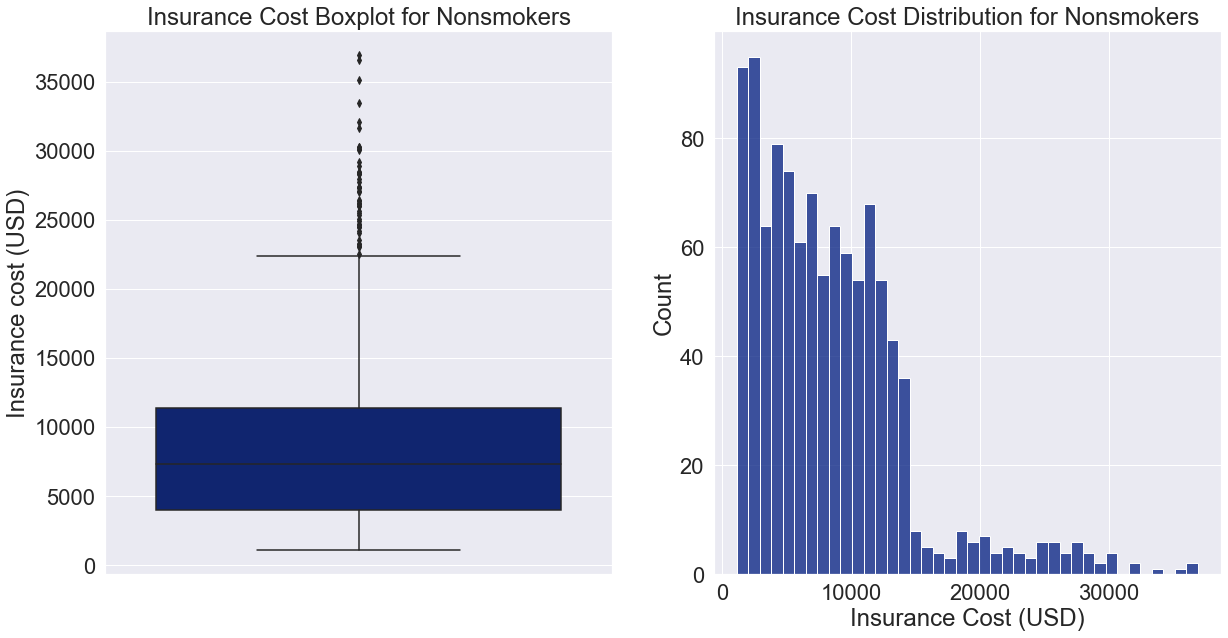

<Figure size 432x288 with 0 Axes>

In [62]:
IQR = stats.iqr(df_nonsmokers.charges, interpolation = 'midpoint')
IQR = round(IQR, 2)
print(IQR)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#boxplot
sns.boxplot(y = df_nonsmokers.charges, ax = ax1)
ax1.set_ylabel('Insurance cost (USD)')
ax1.set_title('Insurance Cost Boxplot for Nonsmokers')

#histogram
sns.histplot(df_nonsmokers.charges, bins = 40, ax = ax2)
ax2.set_xlabel('Insurance Cost (USD)')
ax2.set_title('Insurance Cost Distribution for Nonsmokers')

plt.savefig('nonsmoker_charges_boxplot_histogram.png')
plt.show()
plt.clf()
#right skewed distribution...explain potential causes:  Male and Female? BMI?

## Analyzing the insurance cost of nonsmokers


Now let's look at the nonsmokers.

Summary Stats:
- Mean: \$8,434.27
- Median: \$7,345.41
- Max: \$39,910.61
- Min: \$1,121.87
- Standard Deviation: \$5,990.96
- Variance: 35891656

In [58]:
df_nonsmokers = df[df.smoker == 'no']
#print(df_nonsmokers.head())

#find mean of insurance cost for nonsmokers
nonsmoker_mean = round(np.mean(df_nonsmokers.charges), 2)
print('The nonsmoker average insurance cost for being a smoker: ${mean}'.format(mean = nonsmoker_mean))
#find median of insurance cost for nonsmokers
nonsmoker_median = round(np.median(df_nonsmokers.charges), 2)
print('The nonsmoker median insurance cost for being a smoker: ${median}'.format(median = nonsmoker_median))
#find standard deviation...
nonsmoker_std = round(np.std(df_nonsmokers.charges),2)
print('The nonsmoker standard deviation is: ${std}'.format(std = nonsmoker_std))
#let's see the variance
nonsmoker_var = round(np.var(df_nonsmokers.charges),2)
print('The nonsmoker variance is: {var}'.format(var = nonsmoker_var))
#maximum cost
nonsmoker_max = round(np.max(df_nonsmokers.charges), 2)
print('The nonsmoker maximum insurance cost is: ${max}'.format(max = nonsmoker_max))
#minimum cost
nonsmoker_min = round(np.min(df_nonsmokers.charges), 2)
print('The nonsmoker minimum insurance cost is: ${min}'.format(min = nonsmoker_min))

#For explaination a high standard deviation tells us that here are other reasons the cost is so high since it varies signifcantly

The nonsmoker average insurance cost for being a smoker: $8434.27
The nonsmoker median insurance cost for being a smoker: $7345.41
The nonsmoker standard deviation is: $5990.96
The nonsmoker variance is: 35891656.0
The nonsmoker maximum insurance cost is: $36910.61
The nonsmoker minimum insurance cost is: $1121.87


### Analyzing Male Nonsmokers
Graph One: Cost Distribution
- Right-skewed distribution is again present.
- Knowing this, we should go with the median as the most appropriate statistic instead of the mean.

Graph Two: Barplot of Average Cost per Child
- There seems to be a trend that having more children will lead to higher average insurance costs. 
- Given the information from the smokers, when an individual has 5 children or more, their insurance costs drops signifcantly.
- However, the lowest average comes from having no children at all.

Graph Three: Scatterplot of Cost vs BMI with Region
- There is no correlation between cost and BMI of nonsmokers.
- This is an interesting finding.
- No trends with the region.

Graph Four: Scatterplot of Cost vs Age with Children
- Strong linear relationship between insurance cost and age.
- A secondary trend is shown with the number of children.
 - The less children, the insurance cost is on the lower end of the linear relationship.
 - The more children, the insurance cost is on the higher end of the linear relationship
- The outliers do not follow the trend line.

Graph Five: Barplot of Average Cost per Region
- No valuable insights can be drawn.
- Some regions are simply cheaper than others.

Graph Six: Boxplot of Male Smoker Insurance Cost
- Noteworthy to see the spread of male smokers' insurance cost. 

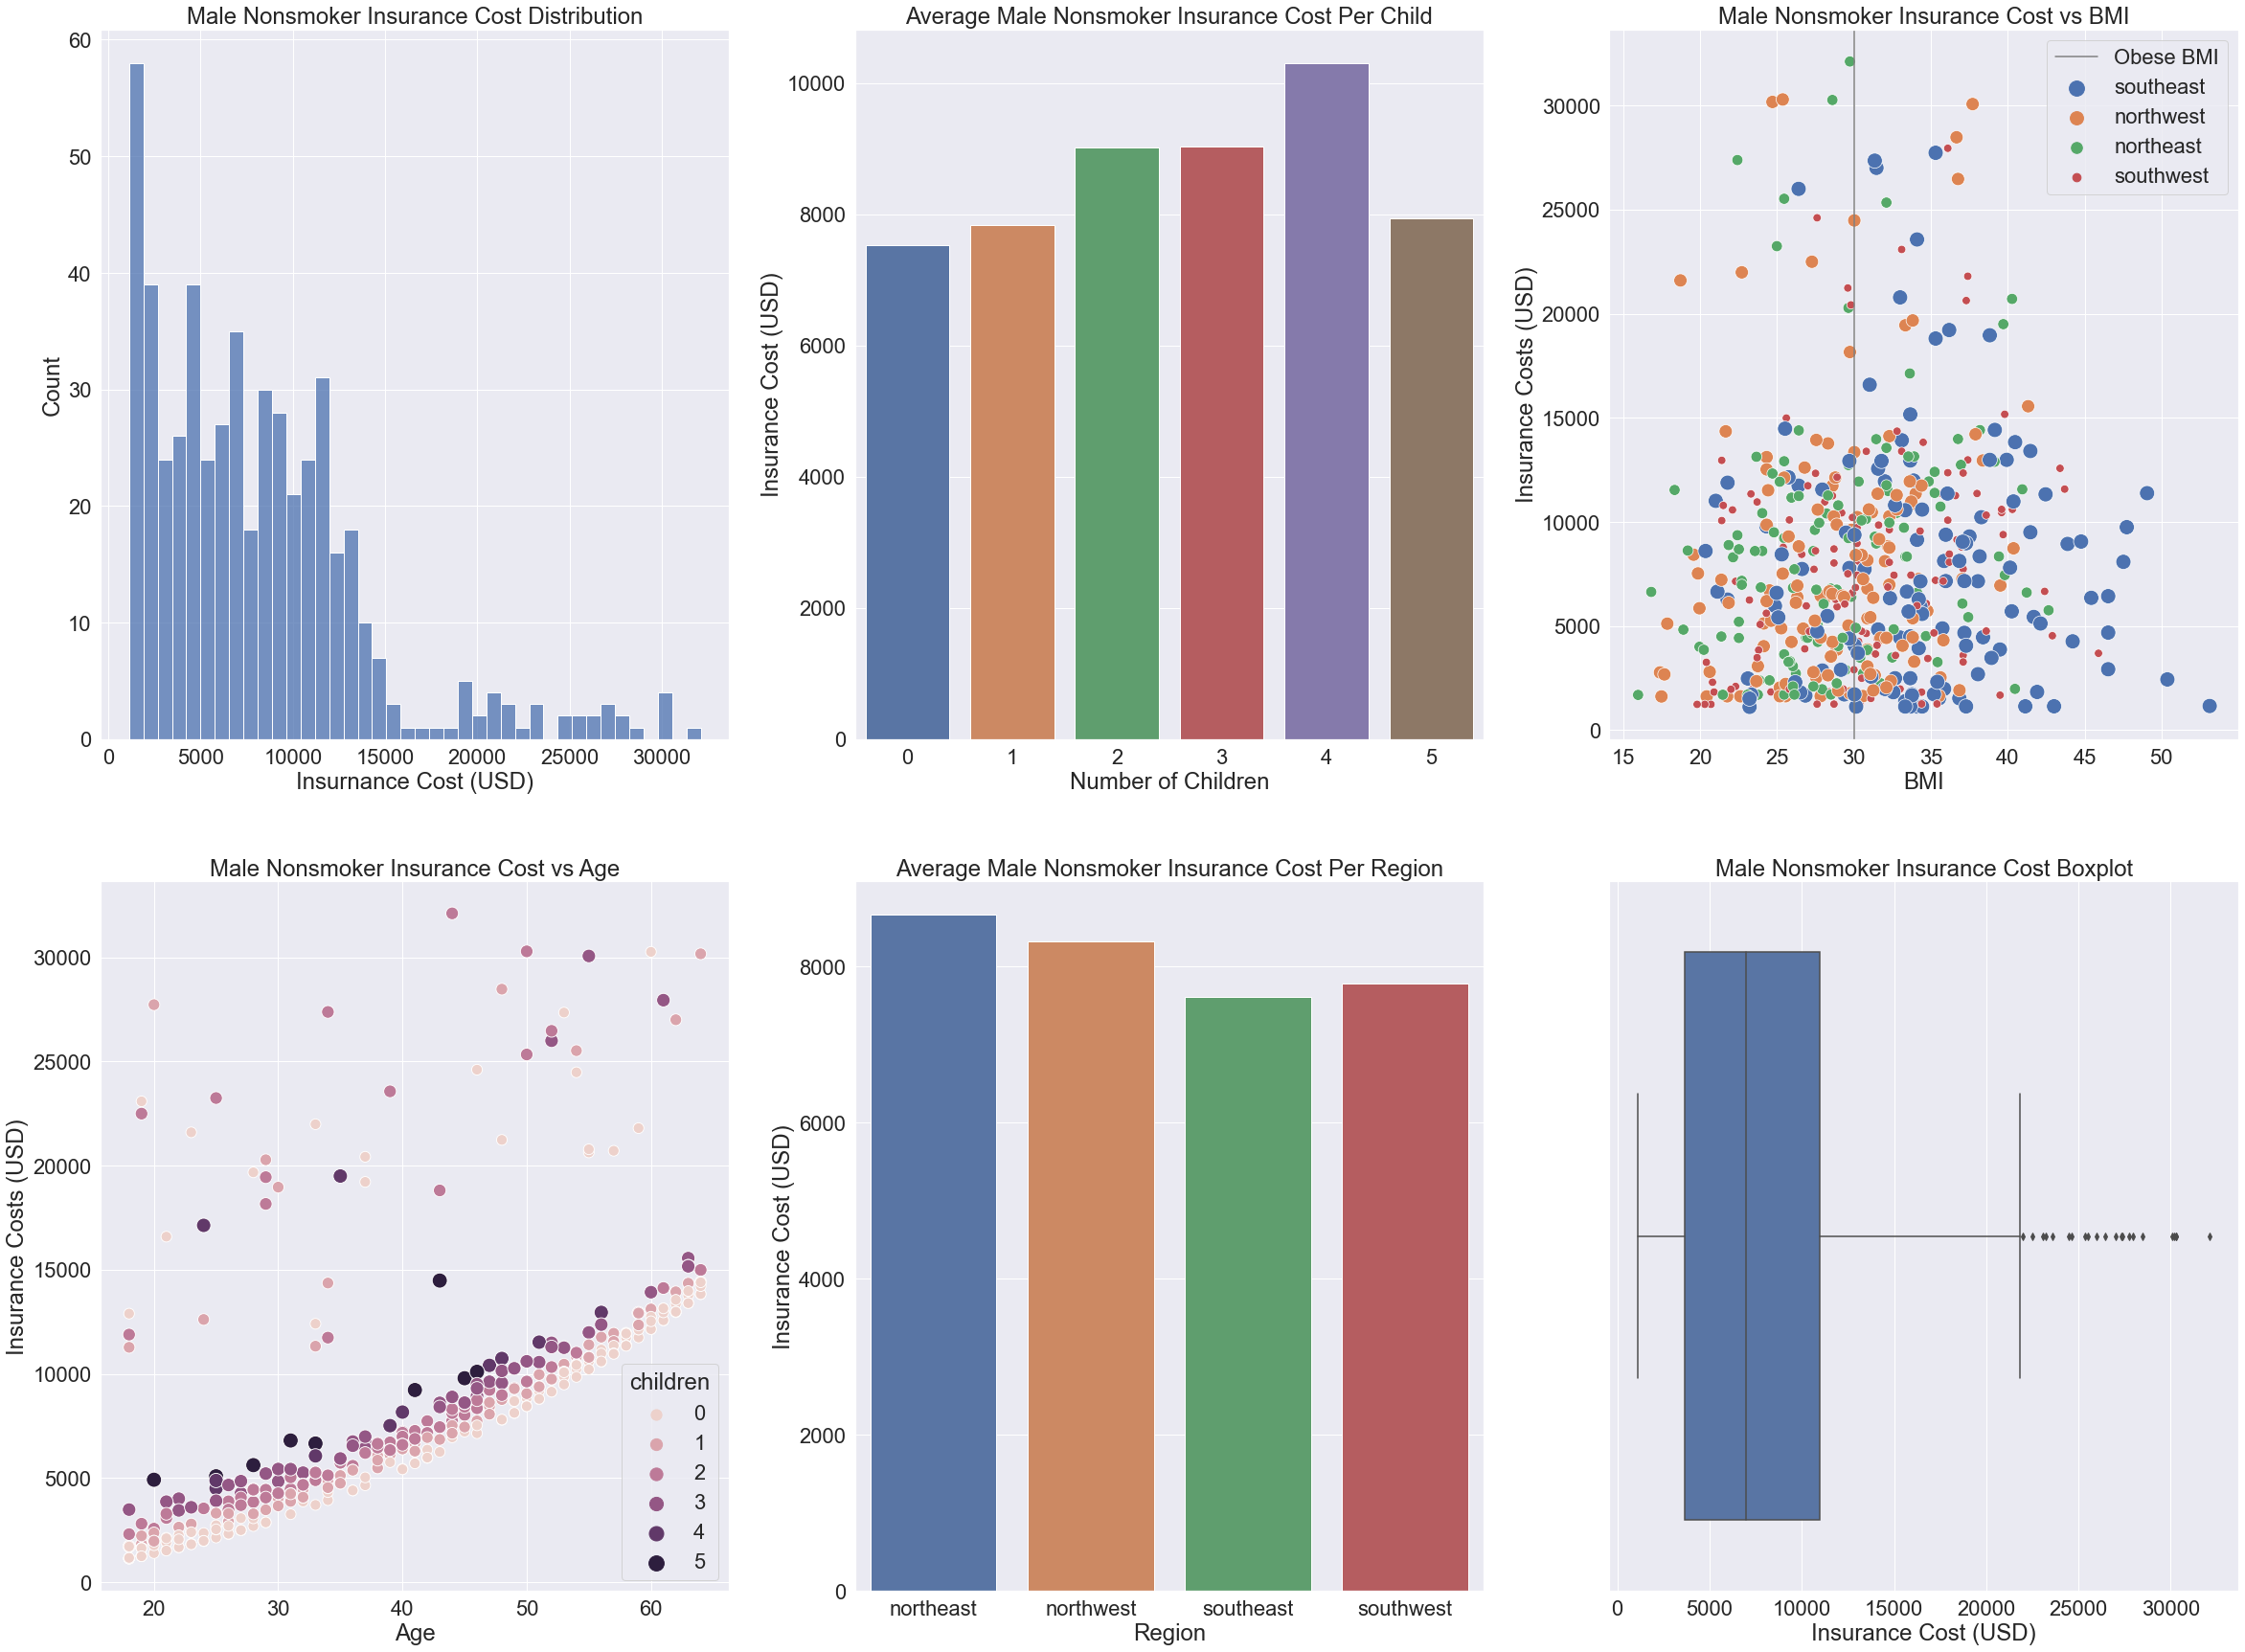

<Figure size 432x288 with 0 Axes>

In [15]:
#seperate all male nonsmokers from the main data set
df_male_nonsmoker = df_nonsmokers[df_nonsmokers.sex == 'male']

#print(male_nonsmoker.head())

fig, ax = plt.subplots(2,3,figsize=(40,30))
sns.set_style('darkgrid')
sns.set(font_scale = 2)

#histogram male nonsmoker
sns.histplot(df_male_nonsmoker.charges, bins = 40, ax = ax[0,0])
ax[0,0].set_title('Male Nonsmoker Insurance Cost Distribution')
ax[0,0].set_xlabel('Insurnance Cost (USD)')

#barplot for insurance cost of male nonsmokers per child
df_children = df_male_nonsmoker.groupby('children').mean().reset_index()
sns.barplot(x = df_children.children, y = df_children.charges, ax = ax[0,1])
ax[0,1].set_title('Average Male Nonsmoker Insurance Cost Per Child')
ax[0,1].set_xlabel('Number of Children')
ax[0,1].set_ylabel('Insurance Cost (USD)')

#scatterplot for insurance cost of male nonsmokers by BMI
sns.scatterplot(x = df_male_nonsmoker.bmi, y = df_male_nonsmoker.charges,
                hue = df_male_nonsmoker.region,
                size = df_male_nonsmoker.region,
                sizes = (75, 250), ax = ax[0,2])
ax[0,2].axvline(x = 30, color = 'gray', label = 'Obese BMI')
ax[0,2].set_title('Male Nonsmoker Insurance Cost vs BMI')
ax[0,2].set_xlabel('BMI')
ax[0,2].set_ylabel('Insurance Costs (USD)')
ax[0,2].legend(bbox_to_anchor = (1.0, 1))

#scatterplot for insurance cost of male nonsmokers by age
sns.scatterplot(x = df_male_nonsmoker.age, y = df_male_nonsmoker.charges,
                hue = df_male_nonsmoker.children,
                size = df_male_nonsmoker.children, sizes = (125,250),
                ax = ax[1,0])
ax[1,0].set_title('Male Nonsmoker Insurance Cost vs Age')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Insurance Costs (USD)')

#barplot for insurance cost of male nonsmokers per region
df_region = df_male_nonsmoker.groupby('region').mean().reset_index()
sns.barplot(x = df_region.region,  y = df_region.charges, ax = ax[1,1])
ax[1,1].set_title('Average Male Nonsmoker Insurance Cost Per Region')
ax[1,1].set_xlabel('Region')
ax[1,1].set_ylabel('Insurance Cost (USD)')

#boxplot of male nonsmoker boxplot
sns.boxplot(x = df_male_nonsmoker.charges, ax = ax[1,2])
ax[1,2].set_title('Male Nonsmoker Insurance Cost Boxplot')
ax[1,2].set_xlabel('Insurance Cost (USD)')
plt.savefig('male_nonsmoker_charges_plots.png')
plt.show()
plt.clf()


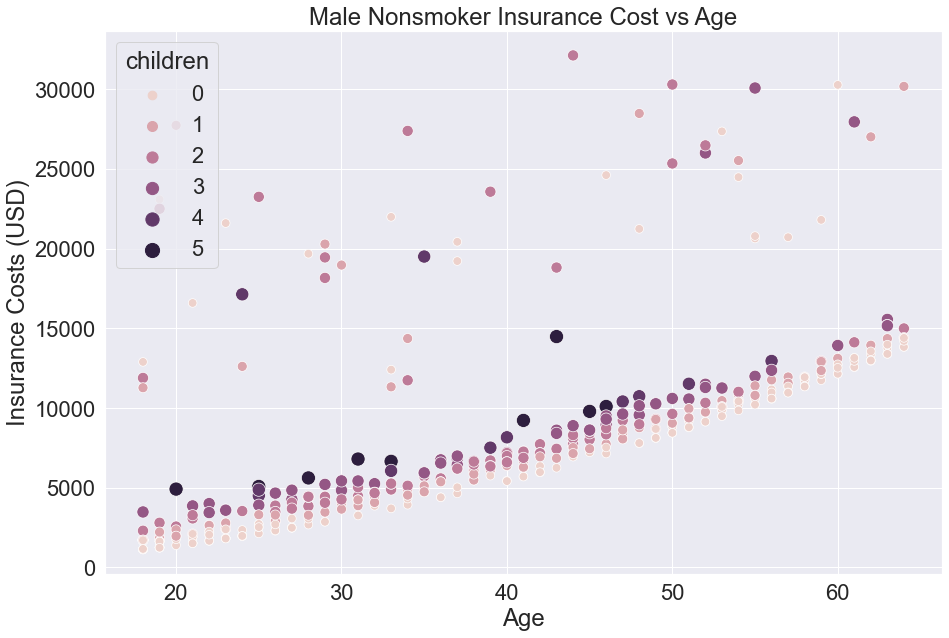

<Figure size 432x288 with 0 Axes>

In [16]:
#highlight scatter plot for linear trend
plt.figure(figsize = (15, 10))
sns.scatterplot(x = df_male_nonsmoker.age, y = df_male_nonsmoker.charges,
                hue = df_male_nonsmoker.children,
                size = df_male_nonsmoker.children,
                sizes = (75, 200))
plt.title('Male Nonsmoker Insurance Cost vs Age')
plt.xlabel('Age')
plt.ylabel('Insurance Costs (USD)')
plt.savefig('male_nonsmoker_insurance_cost_vs_age.png')
plt.show()
plt.clf()
#highlight this
#solid evidence that as age increases, your insurance cost increases as well.
#people with more children see a slightly higher cost overall 

### Analyzing Female Nonsmokers
Graph One: Cost Distribution
- Right-skewed distribution is again present.
- Knowing this, we should go with the median as the most appropriate statistic instead of the mean.

Graph Two: Barplot of Average Cost per Child
- Similar to the male nonsmokers, there seems to be a trend that having more children will result in higher average insurance costs. 
- Given the information from the smokers, when an individual has 5 children or more, their insurance costs drops on average.
- However, the lowest average comes from having no children at all.

Graph Three: Scatterplot of Cost vs BMI with Region
- Again, there is no correlation between cost and BMI of nonsmokers.
- No trends with the region.

Graph Four: Scatterplot of Cost vs Age with Children
- Strong linear relationship between insurance cost and age.
- A secondary trend is shown with the number of children.
 - The less children, the insurance cost is on the lower end of the linear relationship.
 - The more children, the insurance cost is on the higher end of the linear relationship
- The outliers do not follow the trend line.

Graph Five: Barplot of Average Cost per Region
- There is a slight trend of region importance.
- The northeast is more expensive on average than the southwest. 

Graph Six: Boxplot of Male Smoker Insurance Cost
- Noteworthy to see the spread of male smokers' insurance cost. 

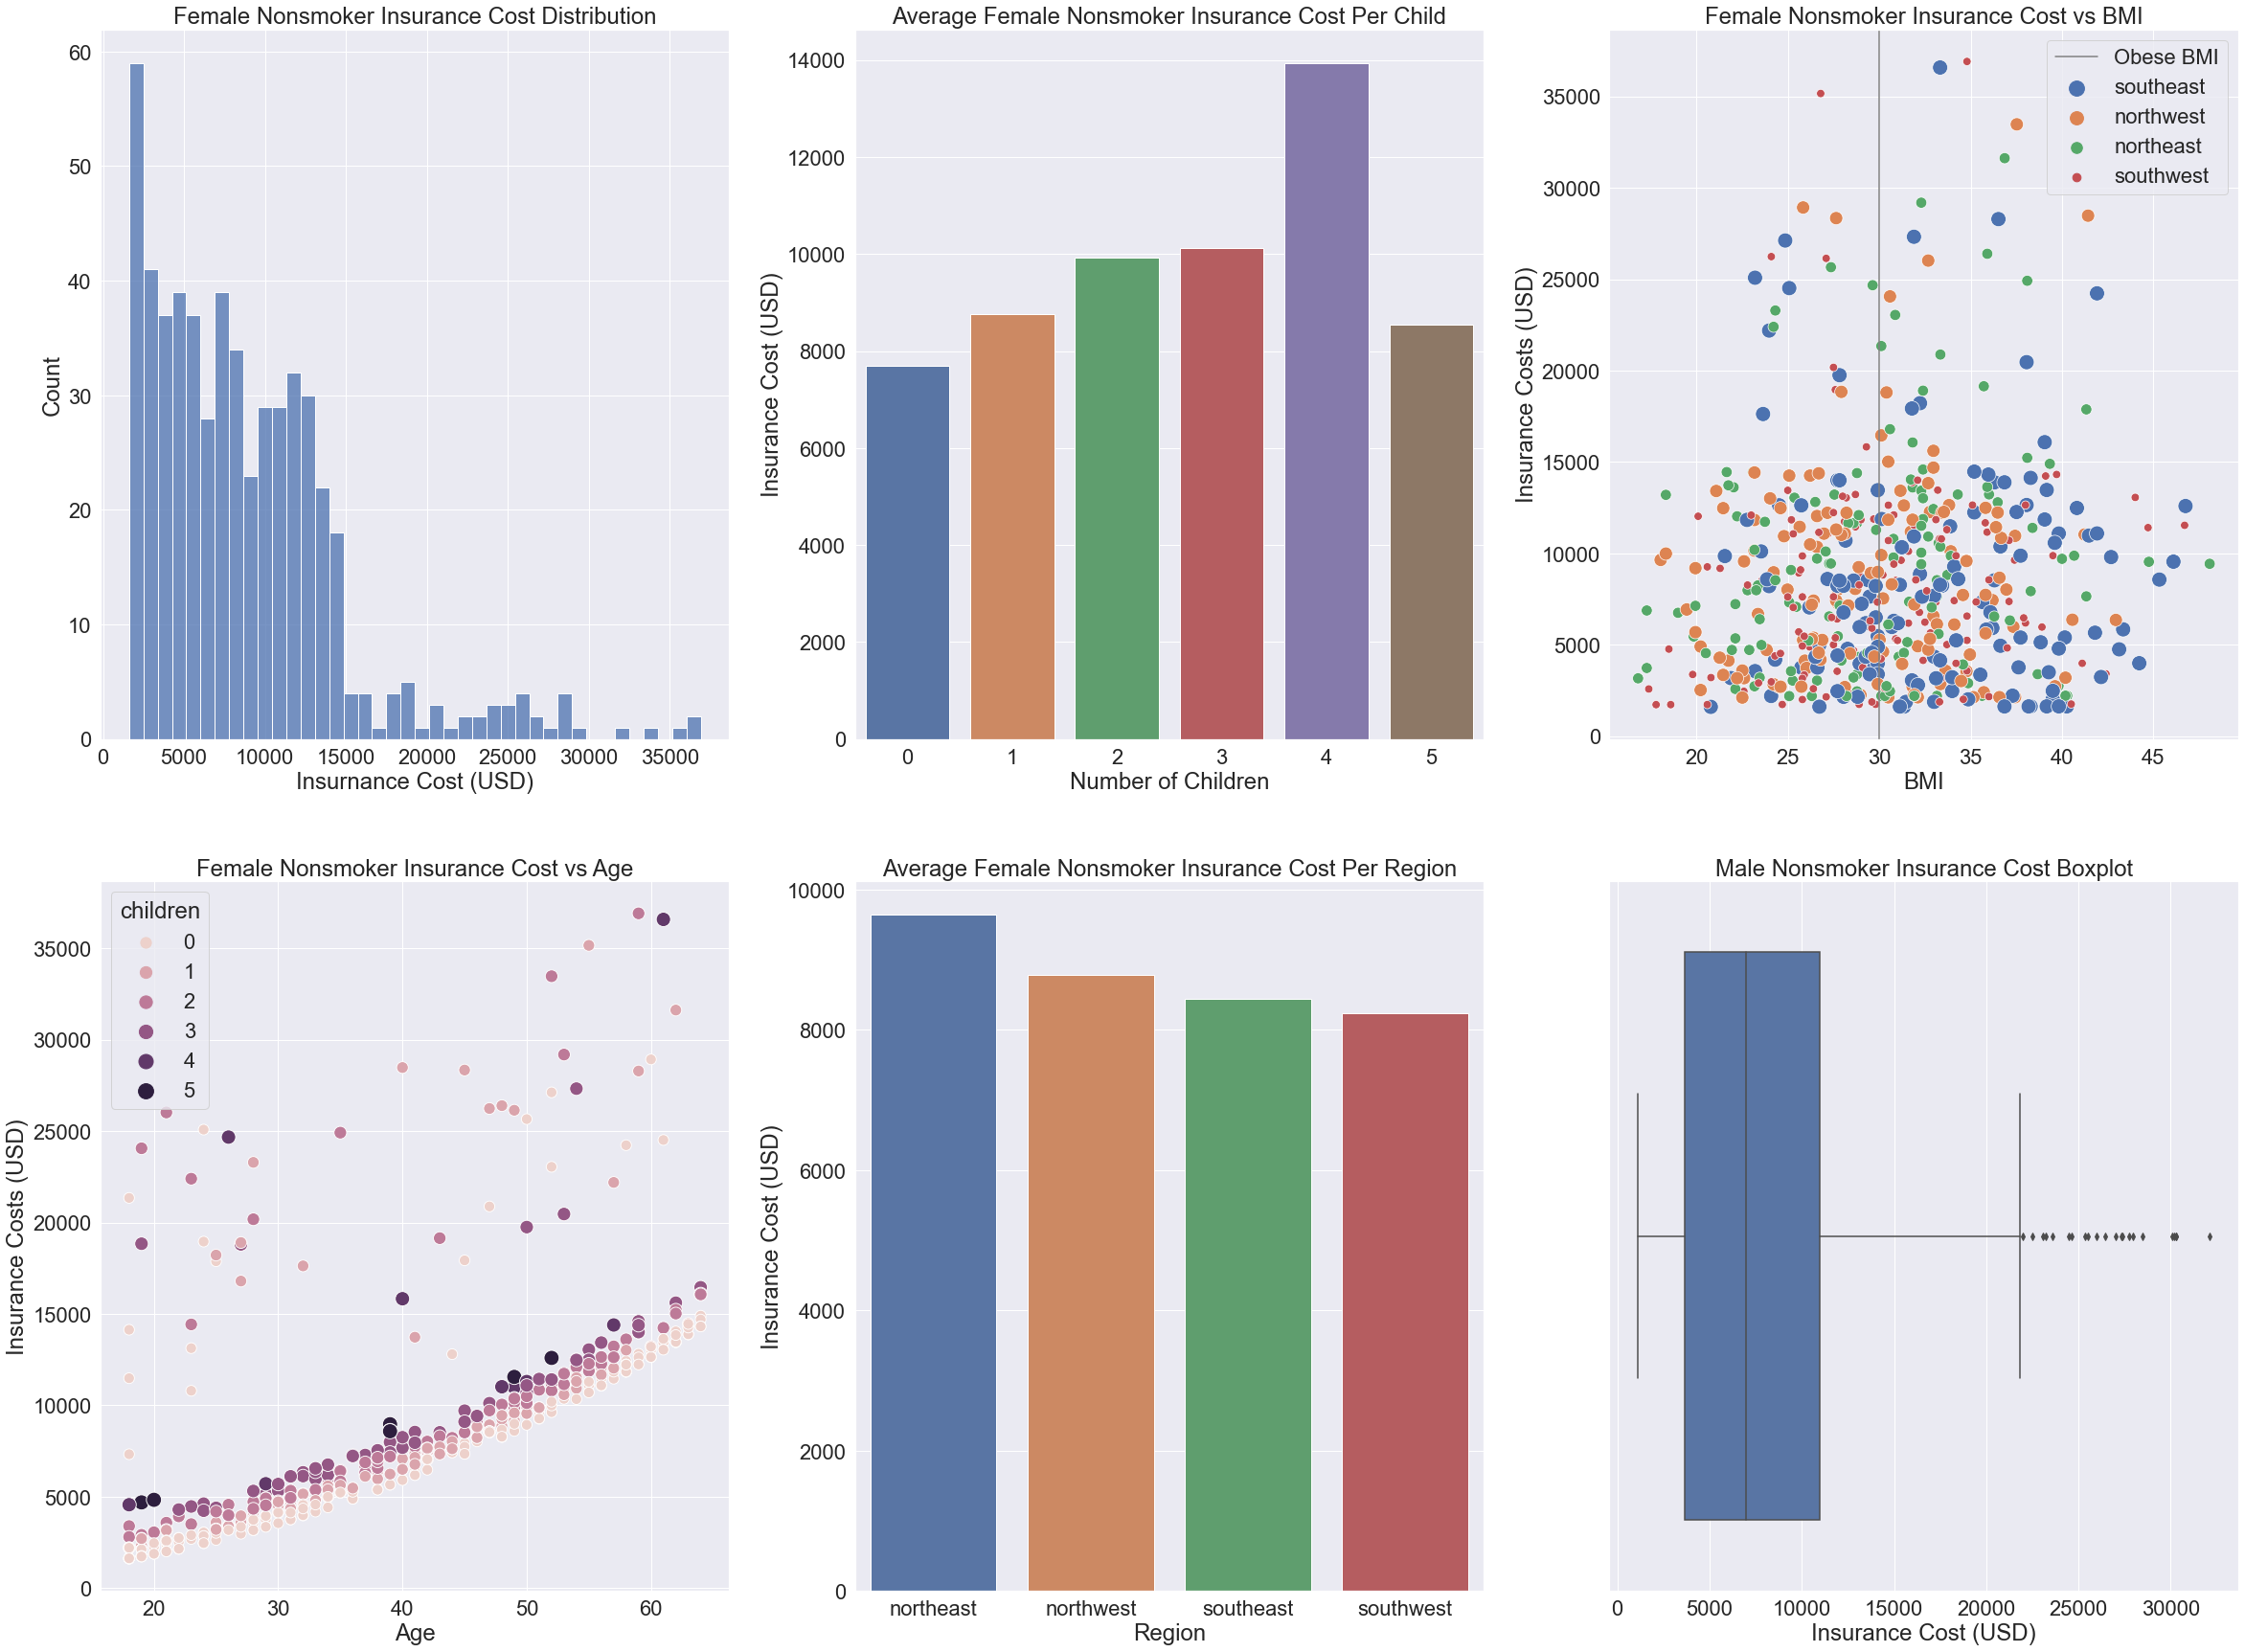

<Figure size 432x288 with 0 Axes>

In [18]:
#seperate all female nonsmokers from the main data set
df_female_nonsmoker = df_nonsmokers[df_nonsmokers.sex == 'female']

#print(df_female_nonsmoker.head())

fig, ax = plt.subplots(2,3,figsize=(40,30))
sns.set_style('darkgrid')
sns.set(font_scale = 2)

#histogram Female nonsmoker
sns.histplot(df_female_nonsmoker.charges, bins = 40, ax = ax[0,0])
ax[0,0].set_title('Female Nonsmoker Insurance Cost Distribution')
ax[0,0].set_xlabel('Insurnance Cost (USD)')

#barplot for insurance cost of Female nonsmokers per child
df_children = df_female_nonsmoker.groupby('children').mean().reset_index()
sns.barplot(x = df_children.children, y = df_children.charges, ax = ax[0,1])
ax[0,1].set_title('Average Female Nonsmoker Insurance Cost Per Child')
ax[0,1].set_xlabel('Number of Children')
ax[0,1].set_ylabel('Insurance Cost (USD)')

#scatterplot for insurance cost of Female nonsmokers by BMI
sns.scatterplot(x = df_female_nonsmoker.bmi, y = df_female_nonsmoker.charges,
                hue = df_female_nonsmoker.region,
                size = df_female_nonsmoker.region,
                sizes = (75, 250), ax = ax[0,2])
ax[0,2].axvline(x = 30, color = 'gray', label = 'Obese BMI')
ax[0,2].set_title('Female Nonsmoker Insurance Cost vs BMI')
ax[0,2].set_xlabel('BMI')
ax[0,2].set_ylabel('Insurance Costs (USD)')
ax[0,2].legend(bbox_to_anchor = (1.0, 1))

#scatterplot for insurance cost of Female nonsmokers by age
sns.scatterplot(x = df_female_nonsmoker.age, y = df_female_nonsmoker.charges,
                hue = df_female_nonsmoker.children,
                size = df_female_nonsmoker.children, sizes = (125,250),
                ax = ax[1,0])
ax[1,0].set_title('Female Nonsmoker Insurance Cost vs Age')
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Insurance Costs (USD)')

#barplot for insurance cost of Female nonsmokers per region
df_region = df_female_nonsmoker.groupby('region').mean().reset_index()
sns.barplot(x = df_region.region,  y = df_region.charges, ax = ax[1,1])
ax[1,1].set_title('Average Female Nonsmoker Insurance Cost Per Region')
ax[1,1].set_xlabel('Region')
ax[1,1].set_ylabel('Insurance Cost (USD)')

#boxplot of Female nonsmoker boxplot
sns.boxplot(x = df_male_nonsmoker.charges, ax = ax[1,2])
ax[1,2].set_title('Male Nonsmoker Insurance Cost Boxplot')
ax[1,2].set_xlabel('Insurance Cost (USD)')
plt.savefig('female_nonsmoker_charges_plots.png')
plt.show()
plt.clf()


# Nonsmokers vs Smokers

In [113]:
#Nonsmokers
df_avg = df_nonsmokers.groupby('sex').mean().reset_index()


nonsmoker_male =  round((df_avg[df_avg.sex == 'male'].charges.sum()),2)
nonsmoker_female = round((df_avg[df_avg.sex == 'female'].charges.sum()),2)
diff = round((nonsmoker_female - nonsmoker_male), 2)
total = nonsmoker_male + nonsmoker_female
nonsmoker_percent_diff = round((((nonsmoker_female - nonsmoker_male) / total) * 100),2) 


print("The average insurance cost for a nonsmoker male is ${avg}.".format(avg = nonsmoker_male))
print("The average insurance cost for a nonsmoker female is ${avg}.".format(avg = nonsmoker_female))
print("The average difference in insurance cost for nonsmoker male and female is ${diff}.\n".format(diff = diff))
print("The nonsmoker males are charged {percent}% less than their female counterpart.\n".format(percent = nonsmoker_percent_diff))

#Smokers
df_avg2 = df_smokers.groupby('sex').mean().reset_index()


smoker_male =  round((df_avg2[df_avg2.sex == 'male'].charges.sum()),2)
smoker_female = round((df_avg2[df_avg2.sex == 'female'].charges.sum()),2)
diff2 = round((smoker_male - smoker_female), 2)
total = smoker_male + smoker_female
smoker_percent_diff = round((((smoker_male - smoker_female) / total) * 100),2) 


print("The average insurance cost for a smoker male is ${avg}.".format(avg = smoker_male))
print("The average insurance cost for a smoker female is ${avg}.".format(avg = smoker_female))
print("The average difference in insurance cost for smoker male and female is ${diff}.\n".format(diff = diff2))
print("The smoker males are charged {percent}% more than their female counterpart.\n".format(percent = smoker_percent_diff))

#Comparision

ins_cost_diff_male = smoker_male - nonsmoker_male
ins_cost_diff_female = smoker_female - nonsmoker_female
ins_cost_avg_diff = diff2 - diff


ins_cost_percent_male = round((smoker_male / nonsmoker_male) * 100, 2)
ins_cost_percent_female = round((smoker_female / nonsmoker_female) * 100, 2)



print("On average, a male nonsmoker pays ${nonsmoker}, while a female smoker pays ${smoker}.".format(nonsmoker = nonsmoker_male, smoker = smoker_male))
print("The difference in their insurance charges is ${diff_male}.".format(diff_male = ins_cost_diff_male))
print("A male smoker will get charged approxmiately {percent}% more than a nonsmoker.\n".format(percent = ins_cost_percent_male))

print("On average, a female nonsmoker pays ${nonsmoker}, while a female smoker pays ${smoker}.".format(nonsmoker = nonsmoker_female, smoker = smoker_female))
print("The difference in their insurance charges is ${diff_female}.".format(diff_female = ins_cost_diff_female))
print("A female smoker will get charged approxmiately {percent}% more than a nonsmoker.".format(percent = ins_cost_percent_female))




The average insurance cost for a nonsmoker male is $8087.2.
The average insurance cost for a nonsmoker female is $8762.3.
The average difference in insurance cost for nonsmoker male and female is $675.1.

The nonsmoker males are charged 4.01% less than their female counterpart.

The average insurance cost for a smoker male is $33042.01.
The average insurance cost for a smoker female is $30679.0.
The average difference in insurance cost for smoker male and female is $2363.01.

The smoker males are charged 3.71% more than their female counterpart.

On average, a male nonsmoker pays $8087.2, while a female smoker pays $33042.01.
The difference in their insurance charges is $24954.81.
A male smoker will get charged approxmiately 408.57% more than a nonsmoker.

On average, a female nonsmoker pays $8762.3, while a female smoker pays $30679.0.
The difference in their insurance charges is $21916.7.
A female smoker will get charged approxmiately 350.12% more than a nonsmoker.


# Results

It is clear that smoking will increase your health insurance charges. Male and female smokers will receive an additional charge for having a BMI equal or greater than 30. Male smokers hitch a 52% increase while female smokers endure a 49% increase. Keep in mind that this apart from their base premium increase for being smokers in the first place. To emphasize, male smokers will approximately be charged 408.57% more than their nonsmoker counterpart. Similarly, female smokers approximately pay 350.12% more than their nonsmoker counterparts. Given the data, it pushes the idea that smoking and being in an unhealthy body mass index will punish those individuals through higher health insurance charges. Note: Overtime, health insurance does get slightly more expensive as we age. 


There is much more to be done with this project. I may come back to it and do some machine learning methods to predict if this sample represents the entire population or not. 


I included two articles: One states that BMI metric is an inaccurate method to measure human height and weight; the other confirms that tabacco usage allows insurance companies to charge those individuals a premium. 

"BMI (body mass index), which is based on the height and weight of a person, is an inaccurate measure of body fat content and does not take into account muscle mass, bone density, overall body composition, and racial and sex differences" (source: https://www.medicalnewstoday.com/articles/265215#:~:text=BMI%20(body%20mass%20index)%2C,of%20Medicine%2C%20University%20of%20Pennsylvania.)

"The practice of charging tobacco users more is called tobacco rating. The ACA allows for insurance companies to charge smokers up to 50% more (or premiums that are 1.5 times higher) than non-smokers through a tobacco surcharge." (source: https://www.healthmarkets.com/content/smoking-and-health-insurance#:~:text=The%20Cost%20of%20Health%20Insurance%20for%20Smokers%20Vs.&text=The%20practice%20of%20charging%20tobacco,smokers%20through%20a%20tobacco%20surcharge).